前 110 个高频词（按文档频率）：
（研究，650）
（机制，318）
（基于，185）
（影响，184）
（优化，148）
（效应，126）
（视角，124）
（企业，120）
（政策，118）
（策略，112）
（驱动，94）
（创新，89）
（行为，88）
（风险，86）
（数据，84）
（理论，80）
（机理，76）
（网络，72）
（路径，69）
（协同，68）
（经济，67）
（智能，64）
（决策，62）
（动态，60）
（技术，60）
（分析，57）
（信息，56）
（治理，51）
（应用，51）
（作用，50）
（模型，49）
（数字，49）
（市场，47）
（方法，46）
（评估，46）
（及其，44）
（设计，43）
（中国，43）
（管理，41）
（模式，41）
（供应链，40）
（平台，39）
（人工，39）
（形成，39）
（发展，38）
（金融，36）
（结构，36）
（产业，36）
（绿色，36）
（转型，36）
（定价，34）
（空间，34）
（演化，34）
（系统，34）
（服务，32）
（城市，32）
（社会，30）
（背景，30）
（激励，28）
（融合，28）
（韧性，28）
（提升，28）
（资源，28）
（学习，27）
（产品，26）
（模态，26）
（生态，26）
（干预，25）
（健康，25）
（后果，25）
（实证，25）
（环境，24）
（资本，24）
（考虑，24）
（问题，23）
（质量，23）
（建模，22）
（面向，22）
（测度，22）
（公司，21）
（消费者，21）
（AI，21）
（效果，21）
（人机，21）
（投资，21）
（气候，21）
（算法，20）
（生产，20）
（预测，20）
（识别，20）
（构建，20）
（制度，20）
（安全，20）
（配置，20）
（数字化，18）
（关键，18）
（传导，18）
（生成式，18）
（消费，18）
（资产，17）
（博弈，17）
（赋能，17）
（政府，16）
（调度，16）
（改革，16）
（竞争，16）
（响应，16）
（运营，16）
（分配，16）
（——，16）


/tmp/ipykernel_37/3688069953.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("plasma")


优化后的前 10 个高频词条形图已保存为 top_10_words_barchart_overall.png
优化后的中文词云图已保存为 wordcloud_overall.png


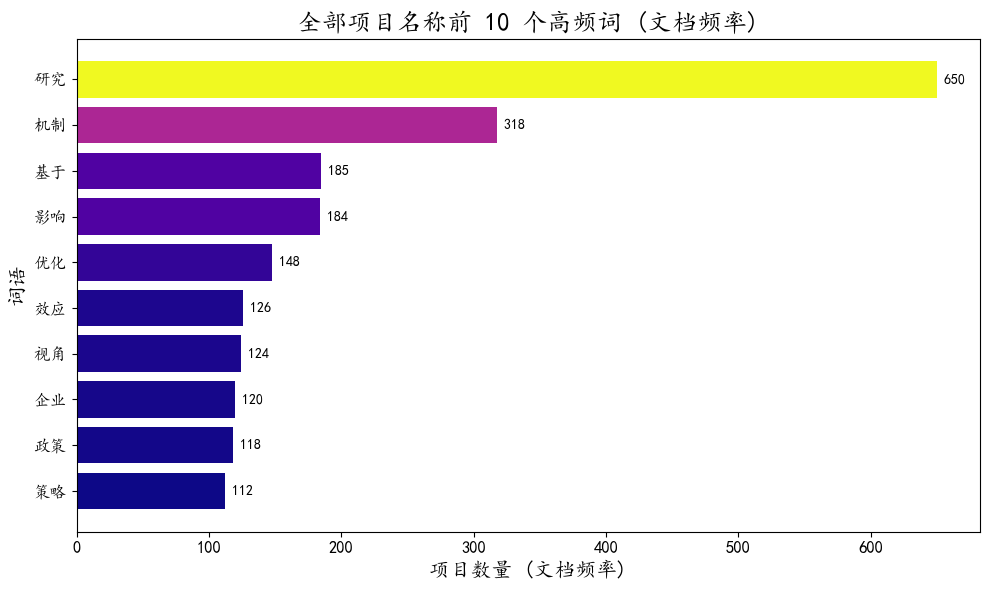

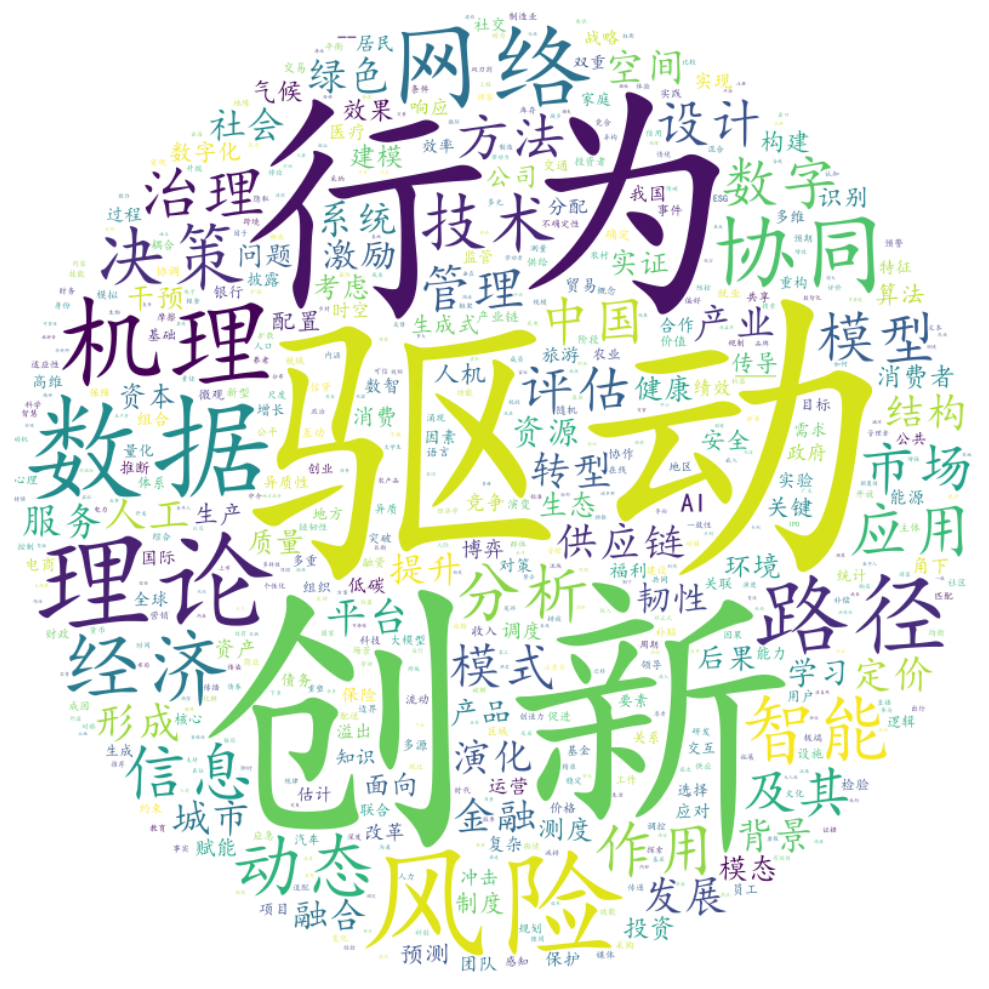

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.font_manager import FontProperties
from collections import Counter
from wordcloud import WordCloud
import numpy as np

# --- 参数与资源设置 ---
N = 10  # 可随时调整
TOP_K = 100 + N  # 需要输出的高频词数量

# === 你的字体文件路径 ===
font_path_chinese = "/kaggle/input/nsfc2025-management/simkai.ttf"
font_path_english = "/kaggle/input/nsfc2025-management/times.ttf"  # 本脚本未用到，但保留以便扩展

# === 你的数据文件路径 ===
csv_path = "/kaggle/input/nsfc2025-management/nsfc-2025-management-title-fenci.csv"

# 1) 自定义停用词（如有需要可添加）
# custom_stopwords = {'研究', '基于', '视角', '模式', '背景', '问题', '影响', '策略', '建设', '发展', '机制', '路径','——'}
custom_stopwords = set()

# 加载字体文件（中文）
font_prop = FontProperties(fname=font_path_chinese)

# --- 数据加载与计算 ---
# 强制读为字符串，避免 NaN 类型问题；兼容 UTF-8
df = pd.read_csv(csv_path, dtype=str, encoding="utf-8")

# 统一去除列名两端空格，兼容“项目名称分词 ”（末尾有空格）
df.columns = [str(c).strip() for c in df.columns]

# 仅保留所需两列（防御性）
required_cols = {"项目名称", "项目名称分词"}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"缺少必需列：{missing}；当前列为：{list(df.columns)}")

df = df.loc[:, ["项目名称", "项目名称分词"]].copy()

# 去除“项目名称分词”列中的缺失
df.dropna(subset=["项目名称分词"], inplace=True)

# 将每条记录的“分词”拆成集合（文档频率按是否出现计 1 次）
words_in_docs = [set(str(text).split()) for text in df["项目名称分词"]]
all_words = [word for doc in words_in_docs for word in doc]
doc_freq = Counter(all_words)

# 从词频中移除停用词
for w in list(custom_stopwords):
    if w in doc_freq:
        del doc_freq[w]

# 输出前 TOP_K 高频词
top_k_words = doc_freq.most_common(TOP_K)
print(f"前 {TOP_K} 个高频词（按文档频率）：")
for w, f in top_k_words:
    print(f"（{w}，{f}）")

# --- 绘制前 N 个高频词的条形图 ---
top_n_words = doc_freq.most_common(N)
if not top_n_words:
    raise ValueError("没有可用于绘图的词频数据，请检查输入数据或停用词设置。")

# 反转以在水平条形图中从下到上显示从小到大
words, freqs = zip(*reversed(top_n_words))

# 渐变色
cmap = cm.get_cmap("plasma")
norm = colors.Normalize(vmin=min(freqs), vmax=max(freqs))
bar_colors = cmap(norm(freqs))

plt.figure(figsize=(10, 6))
plt.barh(words, freqs, color=bar_colors)

# 中文标题与标签
plt.title(f"全部项目名称前 {N} 个高频词 (文档频率)", fontproperties=font_prop, fontsize=18)
plt.xlabel("项目数量 (文档频率)", fontproperties=font_prop, fontsize=15)
plt.ylabel("词语", fontproperties=font_prop, fontsize=15)

# 坐标轴刻度字体
plt.xticks(fontproperties=font_prop, fontsize=12)
plt.yticks(fontproperties=font_prop, fontsize=12)

# 在每个条形上标注数值
for index, value in enumerate(freqs):
    plt.text(value, index, f" {value}", va="center", fontproperties=font_prop, fontsize=10)

plt.tight_layout()
plt.savefig(f"top_{N}_words_barchart_overall.png", dpi=300)
print(f"优化后的前 {N} 个高频词条形图已保存为 top_{N}_words_barchart_overall.png")

# --- 生成并保存词云图 ---
# 词云里剔除已在条形图中显示的前 N 个词，避免两个图重复内容太多
wordcloud_freq = doc_freq.copy()
for word, _ in top_n_words:
    if word in wordcloud_freq:
        del wordcloud_freq[word]

# 构造圆形遮罩
x, y = np.ogrid[:800, :800]
mask = (x - 400) ** 2 + (y - 400) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(
    font_path=font_path_chinese,
    background_color="white",
    width=800,
    height=800,
    mask=mask,
    max_words=2000,
    colormap="viridis",
    prefer_horizontal=1.0  # 所有词语水平显示
).generate_from_frequencies(wordcloud_freq)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.savefig("wordcloud_overall.png", dpi=300)
print("优化后的中文词云图已保存为 wordcloud_overall.png")

In [2]:
# 从高频词中挑选出的领域停用词

word_string = """
研究, 机制, 基于, 影响, 优化, 效应, 视角, 策略, 驱动, 
理论, 机理, 路径, 动态, 分析, 应用, 作用, 模型, 方法, 
评估, 及其, 设计, 中国, 模式, 形成, 发展, 结构, 系统, 
背景, 提升, 后果, 实证, 考虑, 问题, 建模, 面向, 测度, 
效果, 预测, 识别, 构建, 关键, 传导, ——
"""

domain_stopwords = [item.strip() for item in word_string.split(',')]

In [3]:
print(domain_stopwords)

['研究', '机制', '基于', '影响', '优化', '效应', '视角', '策略', '驱动', '理论', '机理', '路径', '动态', '分析', '应用', '作用', '模型', '方法', '评估', '及其', '设计', '中国', '模式', '形成', '发展', '结构', '系统', '背景', '提升', '后果', '实证', '考虑', '问题', '建模', '面向', '测度', '效果', '预测', '识别', '构建', '关键', '传导', '——']
